In [1]:
################################
# Scientific imports
################################
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astroquery.mast import Observations
from astroquery.mast import Catalogs

###
# General imports
###
import csv, math, io, os, os.path, sys, random, time
import pandas as pd
import seaborn as sb
from tqdm.notebook import tqdm, trange

###
# SciKitLearn Imports
###
import sklearn
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from IPython.display import display

###
# MatPlotLib Settings
###

#plt.rcParams["figure.figsize"] = (20,9)
sb.set()

In [2]:
# Load the Data files
fitsarr = np.load("fitslist.npy")
#fluxarr = np.load("fluxlist.npy")
#planetarr = np.load("planetlist.npy")
#isplanetarr = np.load("isplanetlist.npy")

In [3]:
def DrawLC(numcurves=1):
    rndFile = random.randint(0,len(fitsarr))

    #fileNum = fitsList[rndFile]
    fitsFile = fitsarr[rndFile]
    #check = fits.info(file)

    # The following line of code gives us the header values
    fitsHeaders = fits.getheader(fitsFile)
    #fitsHeaders

    #fits.getdata(file, ext=1).columns

    with fits.open(fitsFile, mode="readonly") as hdulist:

        # Extract stellar parameters from the primary header.  We'll get the effective temperature, surface gravity,
        # and TESS magnitude.
        star_teff = hdulist[0].header['TEFF']
        star_logg = hdulist[0].header['LOGG']
        star_tmag = hdulist[0].header['TESSMAG']
        obj = hdulist[0].header['OBJECT']
        sector = hdulist[0].header['SECTOR']

        # Extract some of the fit parameters for the first TCE.  These are stored in the FITS header of the first
        # extension.
        #period = hdulist[1].header['TPERIOD']
        #duration = hdulist[1].header['TDUR']
        #duration = (hdulist[1].header['LIVETIME'])
        #epoch = hdulist[1].header['TEPOCH']
        #depth = hdulist[1].header['TDEPTH']

        # Extract some of the columns of interest for the first TCE signal.  These are stored in the binary FITS table
        # in the first extension.  We'll extract the timestamps in TBJD, phase, initial fluxes, and corresponding
        # model fluxes.
        #times = hdulist[1].data['TIME']
        #phases = hdulist[1].data['PHASE']
        #fluxes_init = hdulist[1].data['LC_INIT']
        #model_fluxes_init = hdulist[1].data['MODEL_INIT']
        tess_bjds = hdulist[1].data['TIME']
        sap_fluxes = hdulist[1].data['SAP_FLUX']
        pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']

    # Define the epoch of primary transit in TBJD.  Our timestamps are also already in TBJD.
    #t0 = 1327.520678

    # Start figure and axis.
    #fig, ax = plt.subplots()

    # Plot the timeseries in black circles.
    ## Using the [1:-1] identifier to cut off the leading and trailing zeroes

    #ax.plot(tess_bjds[1:-1], pdcsap_fluxes[1:-1], 'k.', markersize=1)
    return (tess_bjds[1:-1], pdcsap_fluxes[1:-1], str(rndFile), str(obj), str(sector))

    # Center the x-axis on where we expect a transit to be (time = T0), and set
    # the x-axis range within +/- 1 day of T0.
    ########ax.set_xlim(t0 - 1.0, t0 + 1.0)

    # Overplot a red vertical line that should be where the transit occurs.
    ########ax.axvline(x=t0, color="red")
    

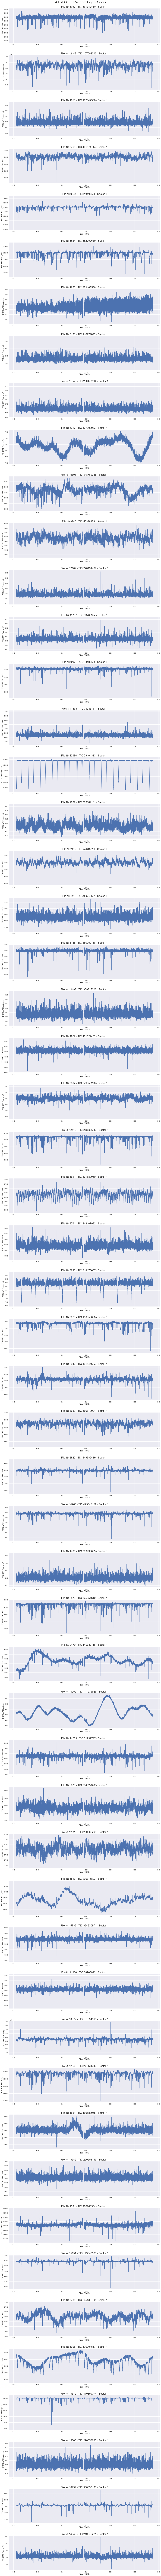

In [11]:
def PlotManyLC(num=3):
    
    fig = plt.figure(figsize=(18,5*num))
    
    for i in range(num):
        
        x,y,f,o,s = DrawLC()
        
        ax = fig.add_subplot(num,1,i+1)
        ax.plot(x,y) #,c=np.random.random(3))
        ax.set_ylabel("PDCSAP Flux (e-/s)", fontsize=14)
        ax.set_xlabel("Time (TBJD)", fontsize=14)
        ax.set_title("File № {} - {} - Sector {}".format(f, o, s), fontsize=20) # + str(obj) + " - Sector " + str(sector))
    
    fig.tight_layout(pad=3.0)
    st = fig.suptitle('A List Of {} Random Light Curves'.format(num),fontsize= 26)

    # shift subplots down:
    st.set_y(1.00)
    
# Number of plots to make
numplots = 55

#Prepare plot space
#plt.rcParams["figure.figsize"] = (20,5*numplots)

# 10: DO PLOT; 20: GOTO 10
PlotManyLC(numplots)

In [12]:
plt.savefig('TEST.pdf')

<Figure size 432x288 with 0 Axes>